# Citation History Analysis

This analysis examines the citation trends of three major drug-target aggregation knowledgebases: DGIdb, Pharos, and OpenTargets. This analysis groups citations by publication year and visualizes the results as a grouped histogram. The plot allows for a comparative assessment of citation growth and trends over time for these resources, highlighting their impact and usage in the scientific community.

## Data preparation
For each resource (DGIdb, Pharos, OpenTargets):
1. Went to each of the resource publications in PubMed
    1. DGIdb 1, 2, 3, 4, 5
        1. https://pubmed.ncbi.nlm.nih.gov/24122041/
        2. https://pubmed.ncbi.nlm.nih.gov/26531824/
        3. https://pubmed.ncbi.nlm.nih.gov/29156001/
        4. https://pubmed.ncbi.nlm.nih.gov/33237278/
        5. https://pubmed.ncbi.nlm.nih.gov/37953380/ 
    2. Pharos (4 publications from "Attributions" section at https://pharos.nih.gov/about)
        1. https://pubmed.ncbi.nlm.nih.gov/27903890/
        2. https://pubmed.ncbi.nlm.nih.gov/31898878/
        3. https://pubmed.ncbi.nlm.nih.gov/33156327/
        4. https://pubmed.ncbi.nlm.nih.gov/36624666/
    3. OpenTargets (5 publications from https://platform-docs.opentargets.org/citation)
        1. https://pubmed.ncbi.nlm.nih.gov/27899665/
        2. https://pubmed.ncbi.nlm.nih.gov/30462303/
        3. https://pubmed.ncbi.nlm.nih.gov/33196847/
        4. https://pubmed.ncbi.nlm.nih.gov/36399499/
        5. https://pubmed.ncbi.nlm.nih.gov/39657122/ 
3. Added all citing records to a resource-specific NCBI collection
    1. [DGIdb](https://pubmed.ncbi.nlm.nih.gov/collections/66441941/?sort=pubdate)
    2. [Pharos](https://pubmed.ncbi.nlm.nih.gov/collections/66441992/?sort=pubdate)
    3. [OpenTargets](https://pubmed.ncbi.nlm.nih.gov/collections/66442014/?sort=pubdate)
4. Exported citation table .csv and abstracts .txt files to `data/` directory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_citations_by_year(dgidb_filepath, pharos_filepath, opentargets_filepath):
    """
    Plot a grouped histogram of citations by year for DGIdb, Pharos, and OpenTargets.

    Args:
        dgidb_filepath (str): Path to the CSV file containing DGIdb citations.
        pharos_filepath (str): Path to the CSV file containing Pharos citations.
        opentargets_filepath (str): Path to the CSV file containing OpenTargets citations.
    """
    # Load the datasets
    dgidb_citations = pd.read_csv(dgidb_filepath)
    pharos_citations = pd.read_csv(pharos_filepath)
    opentargets_citations = pd.read_csv(opentargets_filepath)

    # Clean and validate publication years
    def clean_publication_years(df):
        df["Publication Year"] = pd.to_numeric(df["Publication Year"], errors="coerce")
        return df.dropna(subset=["Publication Year"]).astype({"Publication Year": "int"})

    dgidb_cleaned = clean_publication_years(dgidb_citations)
    pharos_cleaned = clean_publication_years(pharos_citations)
    opentargets_cleaned = clean_publication_years(opentargets_citations)

    # Group by publication year
    def group_by_year(df, source_name):
        grouped = df.groupby("Publication Year").size().reset_index(name="Citations")
        grouped["Source"] = source_name
        return grouped

    dgidb_grouped = group_by_year(dgidb_cleaned, "DGIdb")
    pharos_grouped = group_by_year(pharos_cleaned, "Pharos")
    opentargets_grouped = group_by_year(opentargets_cleaned, "OpenTargets")

    # Combine datasets
    combined_grouped = pd.concat([dgidb_grouped, pharos_grouped, opentargets_grouped])

    # Determine the range of years
    all_years = sorted(combined_grouped["Publication Year"].unique())
    x = np.arange(len(all_years))  # X-axis positions
    width = 0.25  # Bar width

    # Reformat data for grouped histogram
    dgidb_counts = dgidb_grouped.set_index("Publication Year").reindex(all_years, fill_value=0)["Citations"]
    pharos_counts = pharos_grouped.set_index("Publication Year").reindex(all_years, fill_value=0)["Citations"]
    opentargets_counts = opentargets_grouped.set_index("Publication Year").reindex(all_years, fill_value=0)["Citations"]

    # Plot grouped histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, dgidb_counts, width, label="DGIdb", color="purple")
    ax.bar(x, pharos_counts, width, label="Pharos", color="gray")
    ax.bar(x + width, opentargets_counts, width, label="OpenTargets", color="lightblue")

    # Customize the plot
    ax.set_xlabel("Publication Year")
    ax.set_ylabel("Number of Publications")
    ax.set_title("Citations By Year of Major Drug-Target Aggregation Knowledgebases")
    ax.set_xticks(x)
    ax.set_xticklabels(all_years, rotation=45)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.savefig("citations by year.png")
    plt.show()

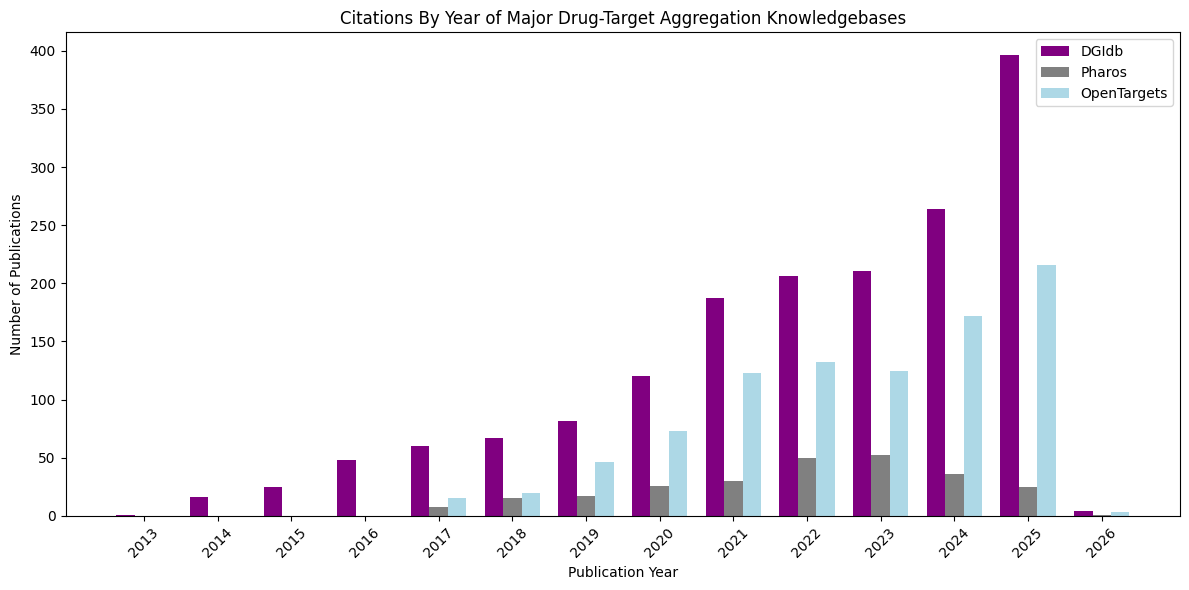

In [3]:
plot_citations_by_year("data/dgidb-citations.csv", "data/pharos-citations.csv", "data/opentargets-citations.csv")